# Predict the Genetic Disorder

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (16,10)

import seaborn as sns
sns.set_style('whitegrid')

## Loading given dataset

In [3]:
pd.set_option('display.max_columns', None) # displaying all the columns in df.head()

In [4]:
df = pd.read_csv(r"train.csv")
df.head(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,NaN,63.0,Not applicable,-,Alive,Normal (30-60),NaN,NaN,0.0,0.0,1.0,0.0,NaN,Low,Male,No record,Not applicable,Home,NaN,Yes,No,Not applicable,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,40.0,NaN,Not applicable,-,Alive,Tachypnea,Normal,0.0,0.0,NaN,1.0,0.0,Yes,Low,NaN,No record,Not applicable,Home,Yes,Yes,No,-,No,Yes,1.0,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,45.0,44.0,Lemuel Shattuck Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 021

## Exploratry Data Analysis

In [5]:
# cheking all the highlevel information of this data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [6]:
# check all the number of unique values
df.nunique()

# checking the count of whether is there any null values are there or not.
df.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [7]:
df["Genetic Disorder"].unique()
df["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

<AxesSubplot:>

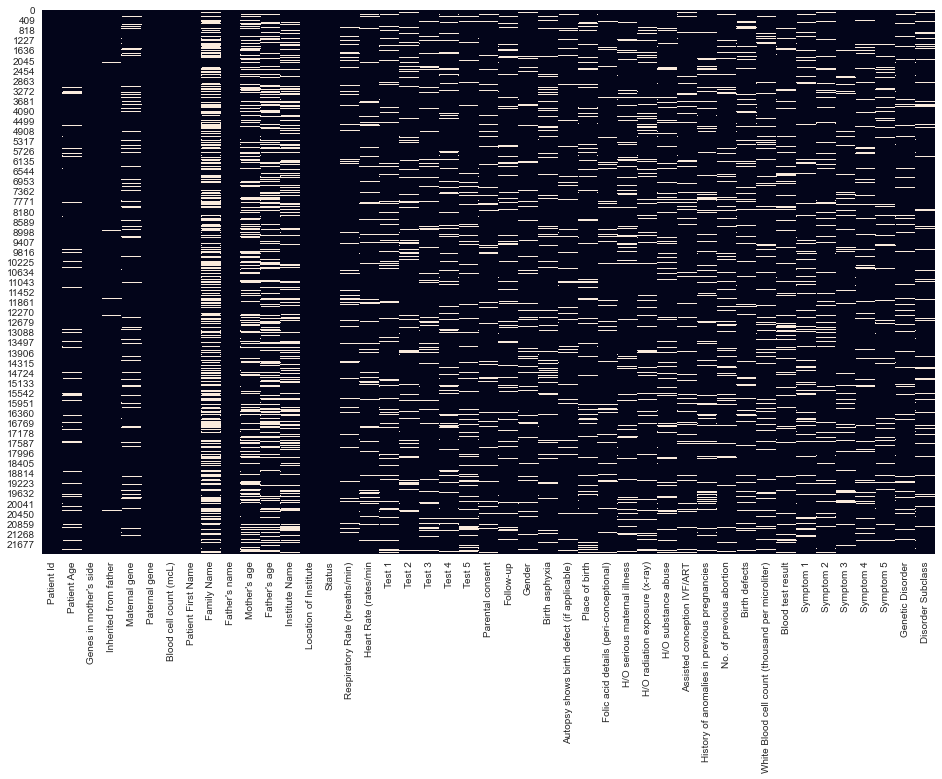

In [8]:
sns.heatmap(df.isnull(), cbar= False)

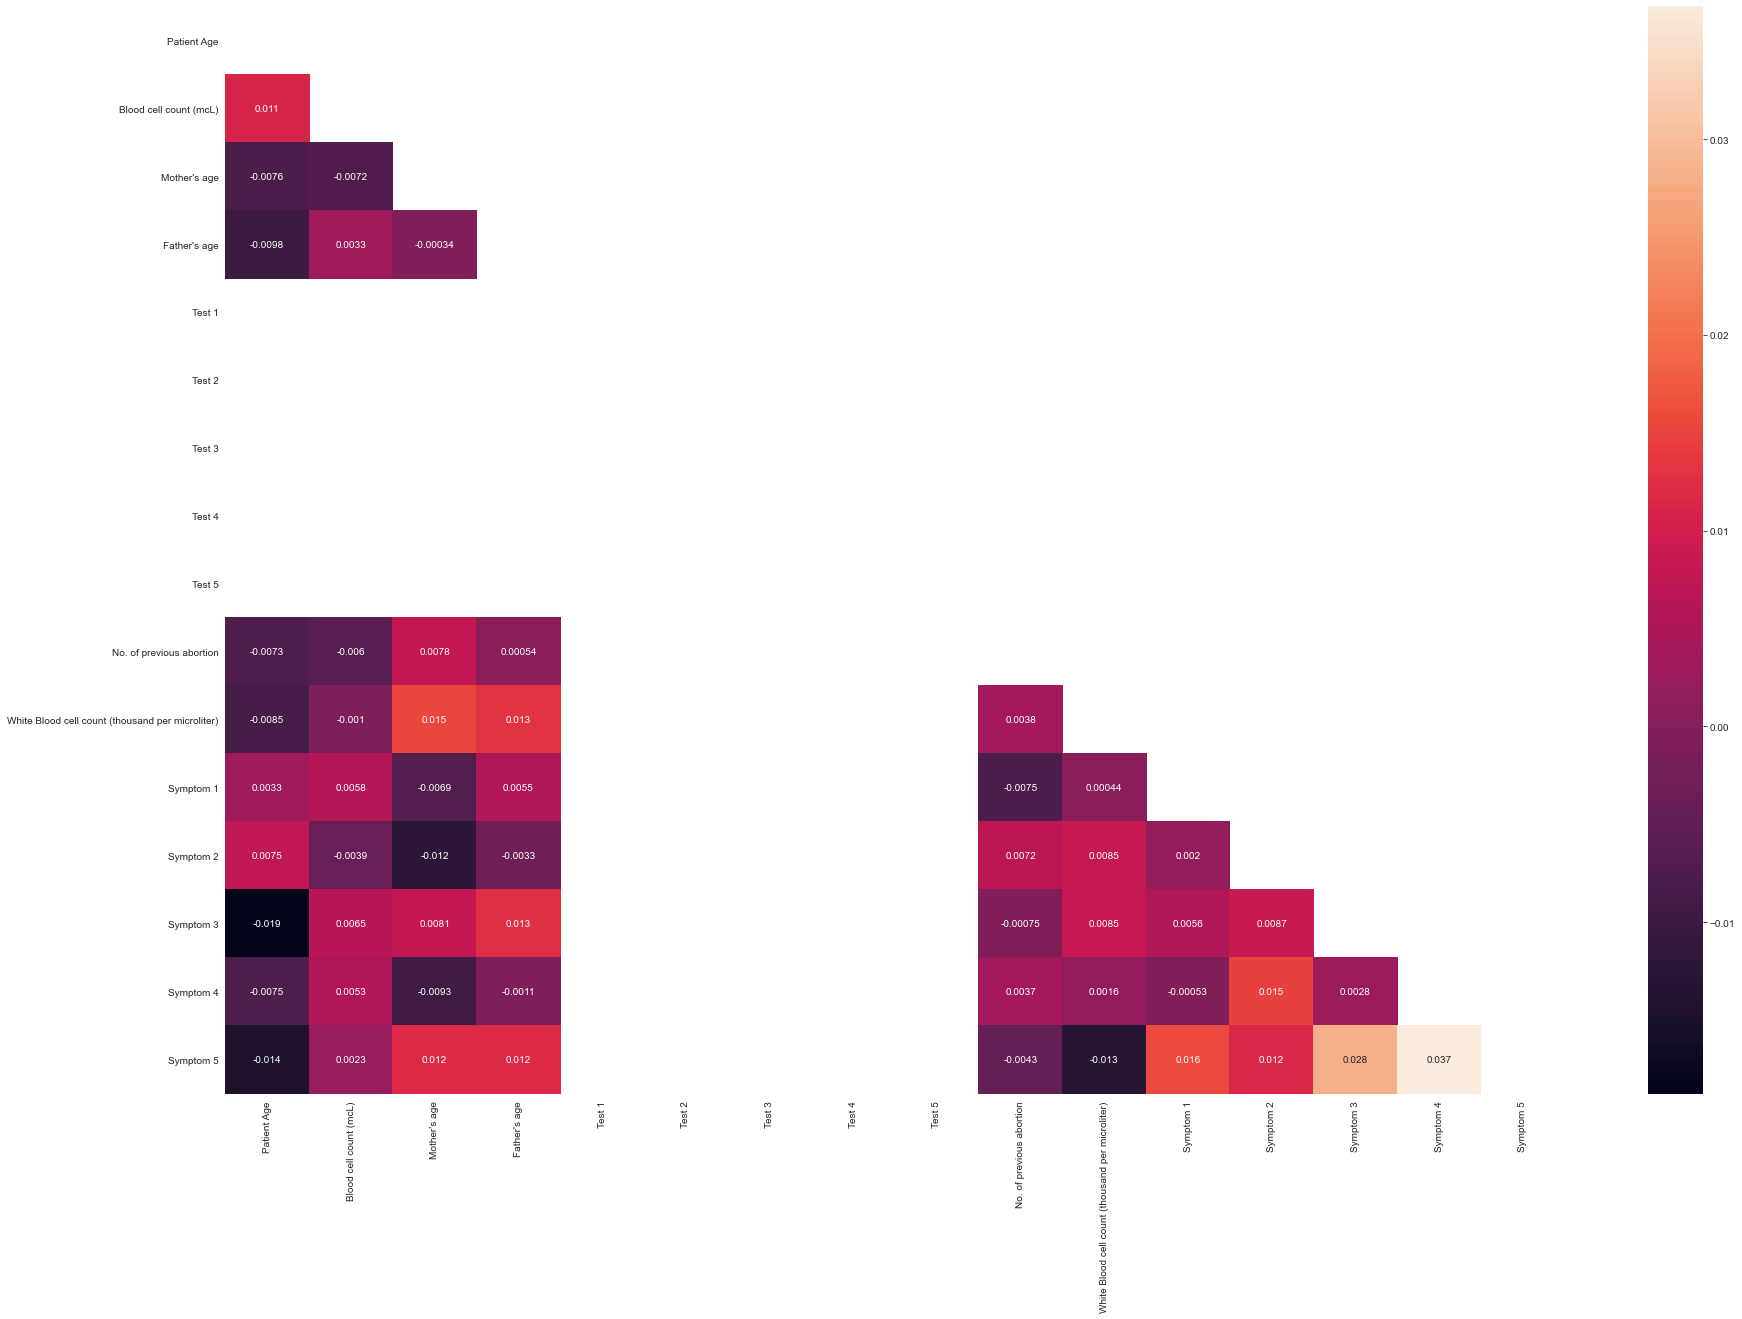

In [9]:
%matplotlib inline

corr = df.corr()
plt.figure(figsize=(30,20))
mask = np.zeros_like(corr, dtype= np.bool)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask= mask, annot= True)

plt.show()

Each of those correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1.
If there is a strong negative correlation, it will be represented by a value of -1.

<h3>Multicollinearity</h3>is a phenomenon in which one independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. In other words, one independent variable can be linearly predicted from one or multiple other independent variables with a substantial degree of certainty.

In [10]:
# creating a function which will seperate numerical and categorical features

def getFeature(df):
    num_feature = df.select_dtypes(include= ['number'])
    cat_feature = df.select_dtypes(include= ['object'])
    return num_feature, cat_feature

In [11]:
num_feature, cat_feature = getFeature(df)

### Creating the Boxplot for Numerical Features

In [21]:
num_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Blood cell count (mcL)                            22083 non-null  float64
 2   Mother's age                                      16047 non-null  float64
 3   Father's age                                      16097 non-null  float64
 4   Test 1                                            19956 non-null  float64
 5   Test 2                                            19931 non-null  float64
 6   Test 3                                            19936 non-null  float64
 7   Test 4                                            19943 non-null  float64
 8   Test 5                                            19913 non-null  float64
 9   No. of previous a

In [14]:
# num_feature[''].isnull().values.any() # to check null values 
num_feature.isnull().sum()

Patient Age                                         1427
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
No. of previous abortion                            2162
White Blood cell count (thousand per microliter)    2148
Symptom 1                                           2155
Symptom 2                                           2222
Symptom 3                                           2101
Symptom 4                                           2113
Symptom 5                                           2153
dtype: int64

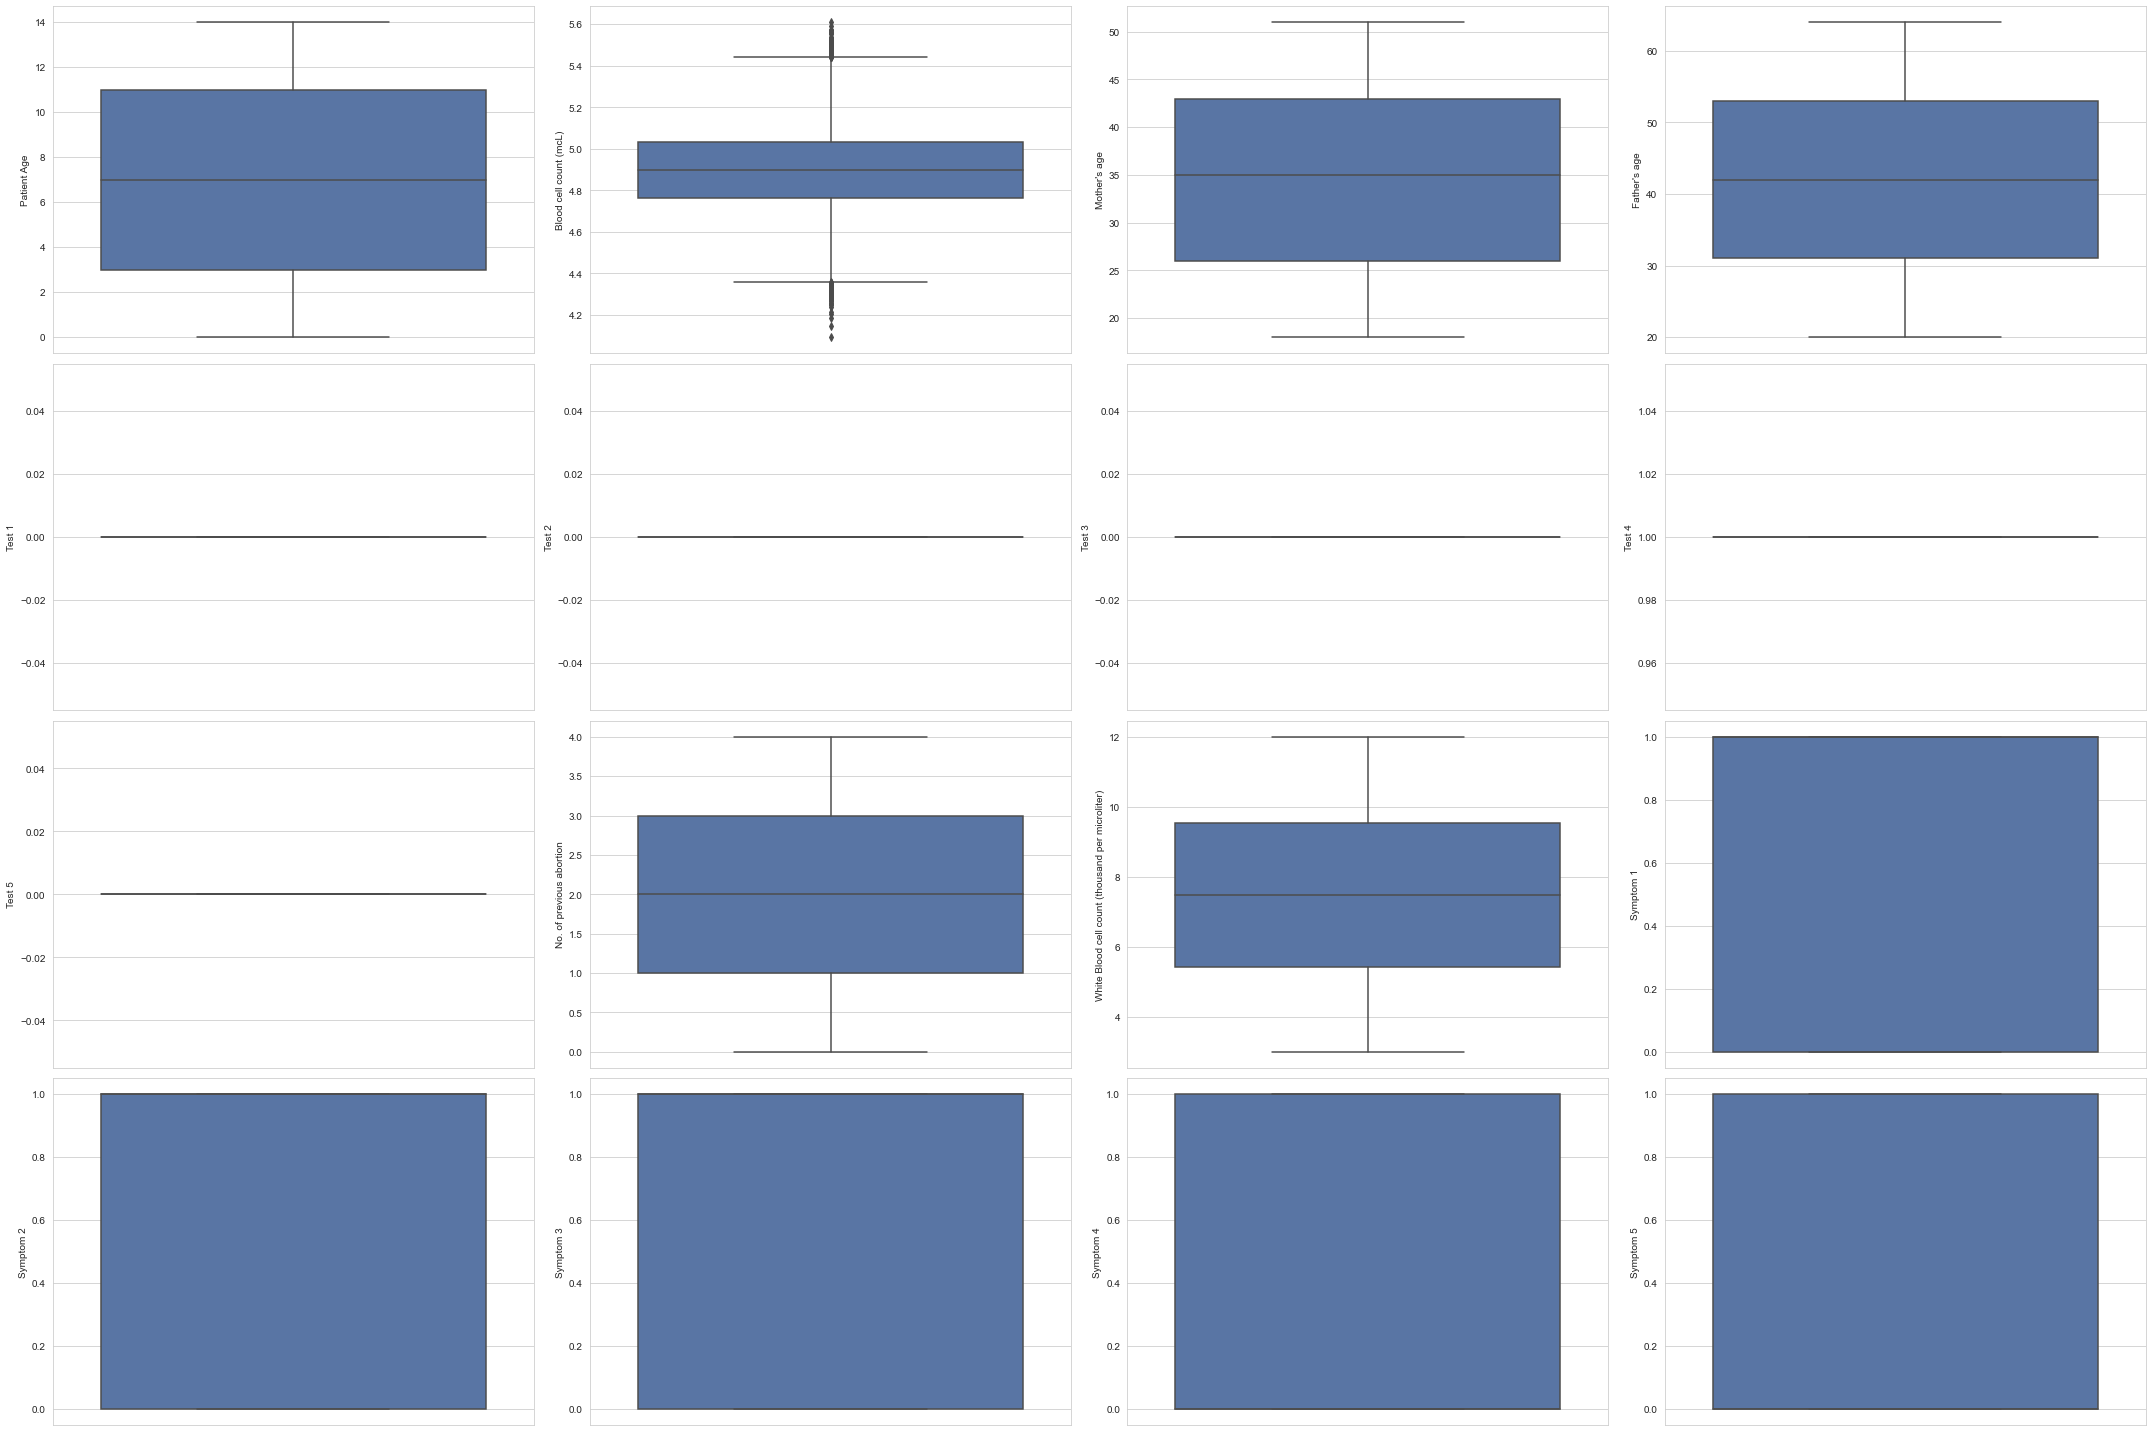

In [12]:
figure1 = plt.figure(figsize= (30,20))

for i in range(len(num_feature.columns)): 
    figure1.add_subplot(4,4,i+1) # adding the graphs into 30,20
    # print(num_feature.iloc[:,i]) # did for testing purpose
    sns.boxplot(y = num_feature.iloc[:,i]) # y= assigning into variable will save into the warning
plt.tight_layout() # 
plt.show()

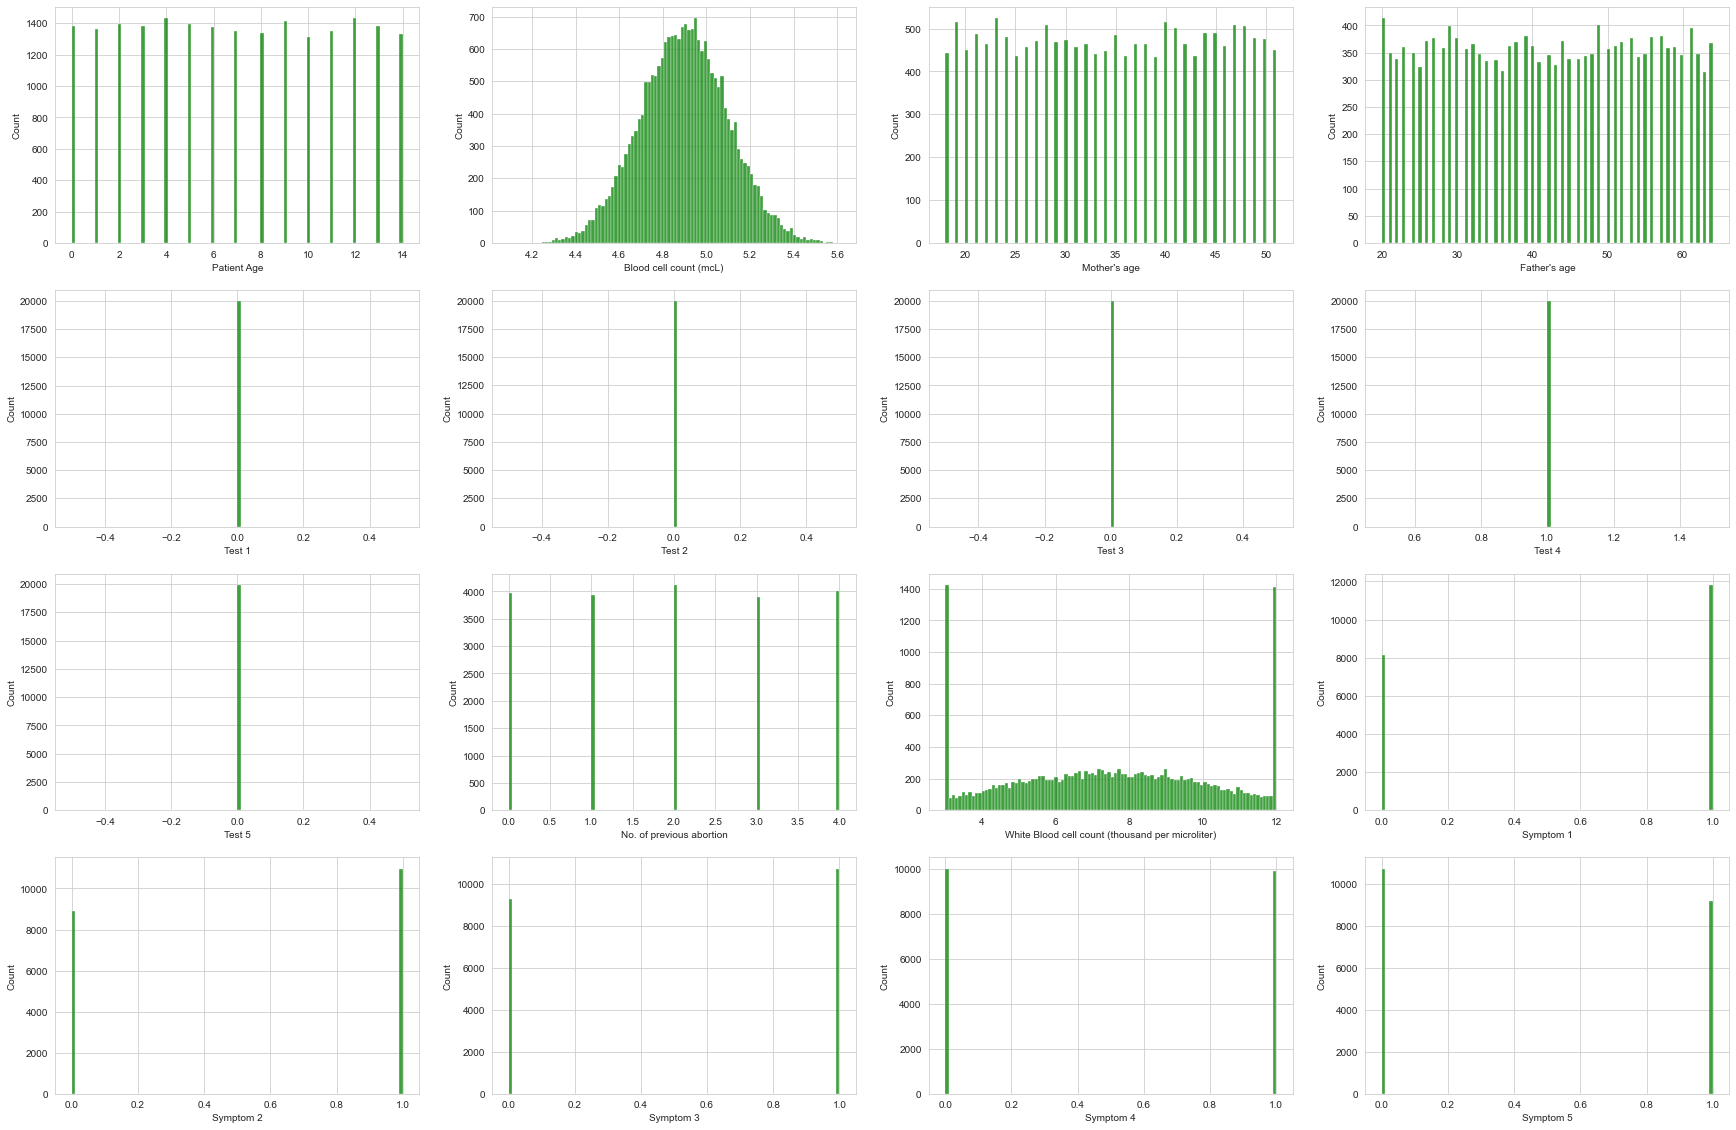

In [13]:
#plt.figure(figsize= (10,5))
figure3 = plt.figure(figsize= (30,20))

for i in range(len(num_feature.columns)):
    figure3.add_subplot(4,4, i+1)
    sns.histplot(num_feature.iloc[:,i], bins= 100, color= "green")
    
sns.set_style("darkgrid")
plt.show()

### Creating the Histogram for Categorical Features

In [15]:
cat_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Patient Id                                    22083 non-null  object
 1   Genes in mother's side                        22083 non-null  object
 2   Inherited from father                         21777 non-null  object
 3   Maternal gene                                 19273 non-null  object
 4   Paternal gene                                 22083 non-null  object
 5   Patient First Name                            22083 non-null  object
 6   Family Name                                   12392 non-null  object
 7   Father's name                                 22083 non-null  object
 8   Institute Name                                16977 non-null  object
 9   Location of Institute                         22083 non-null  object
 10

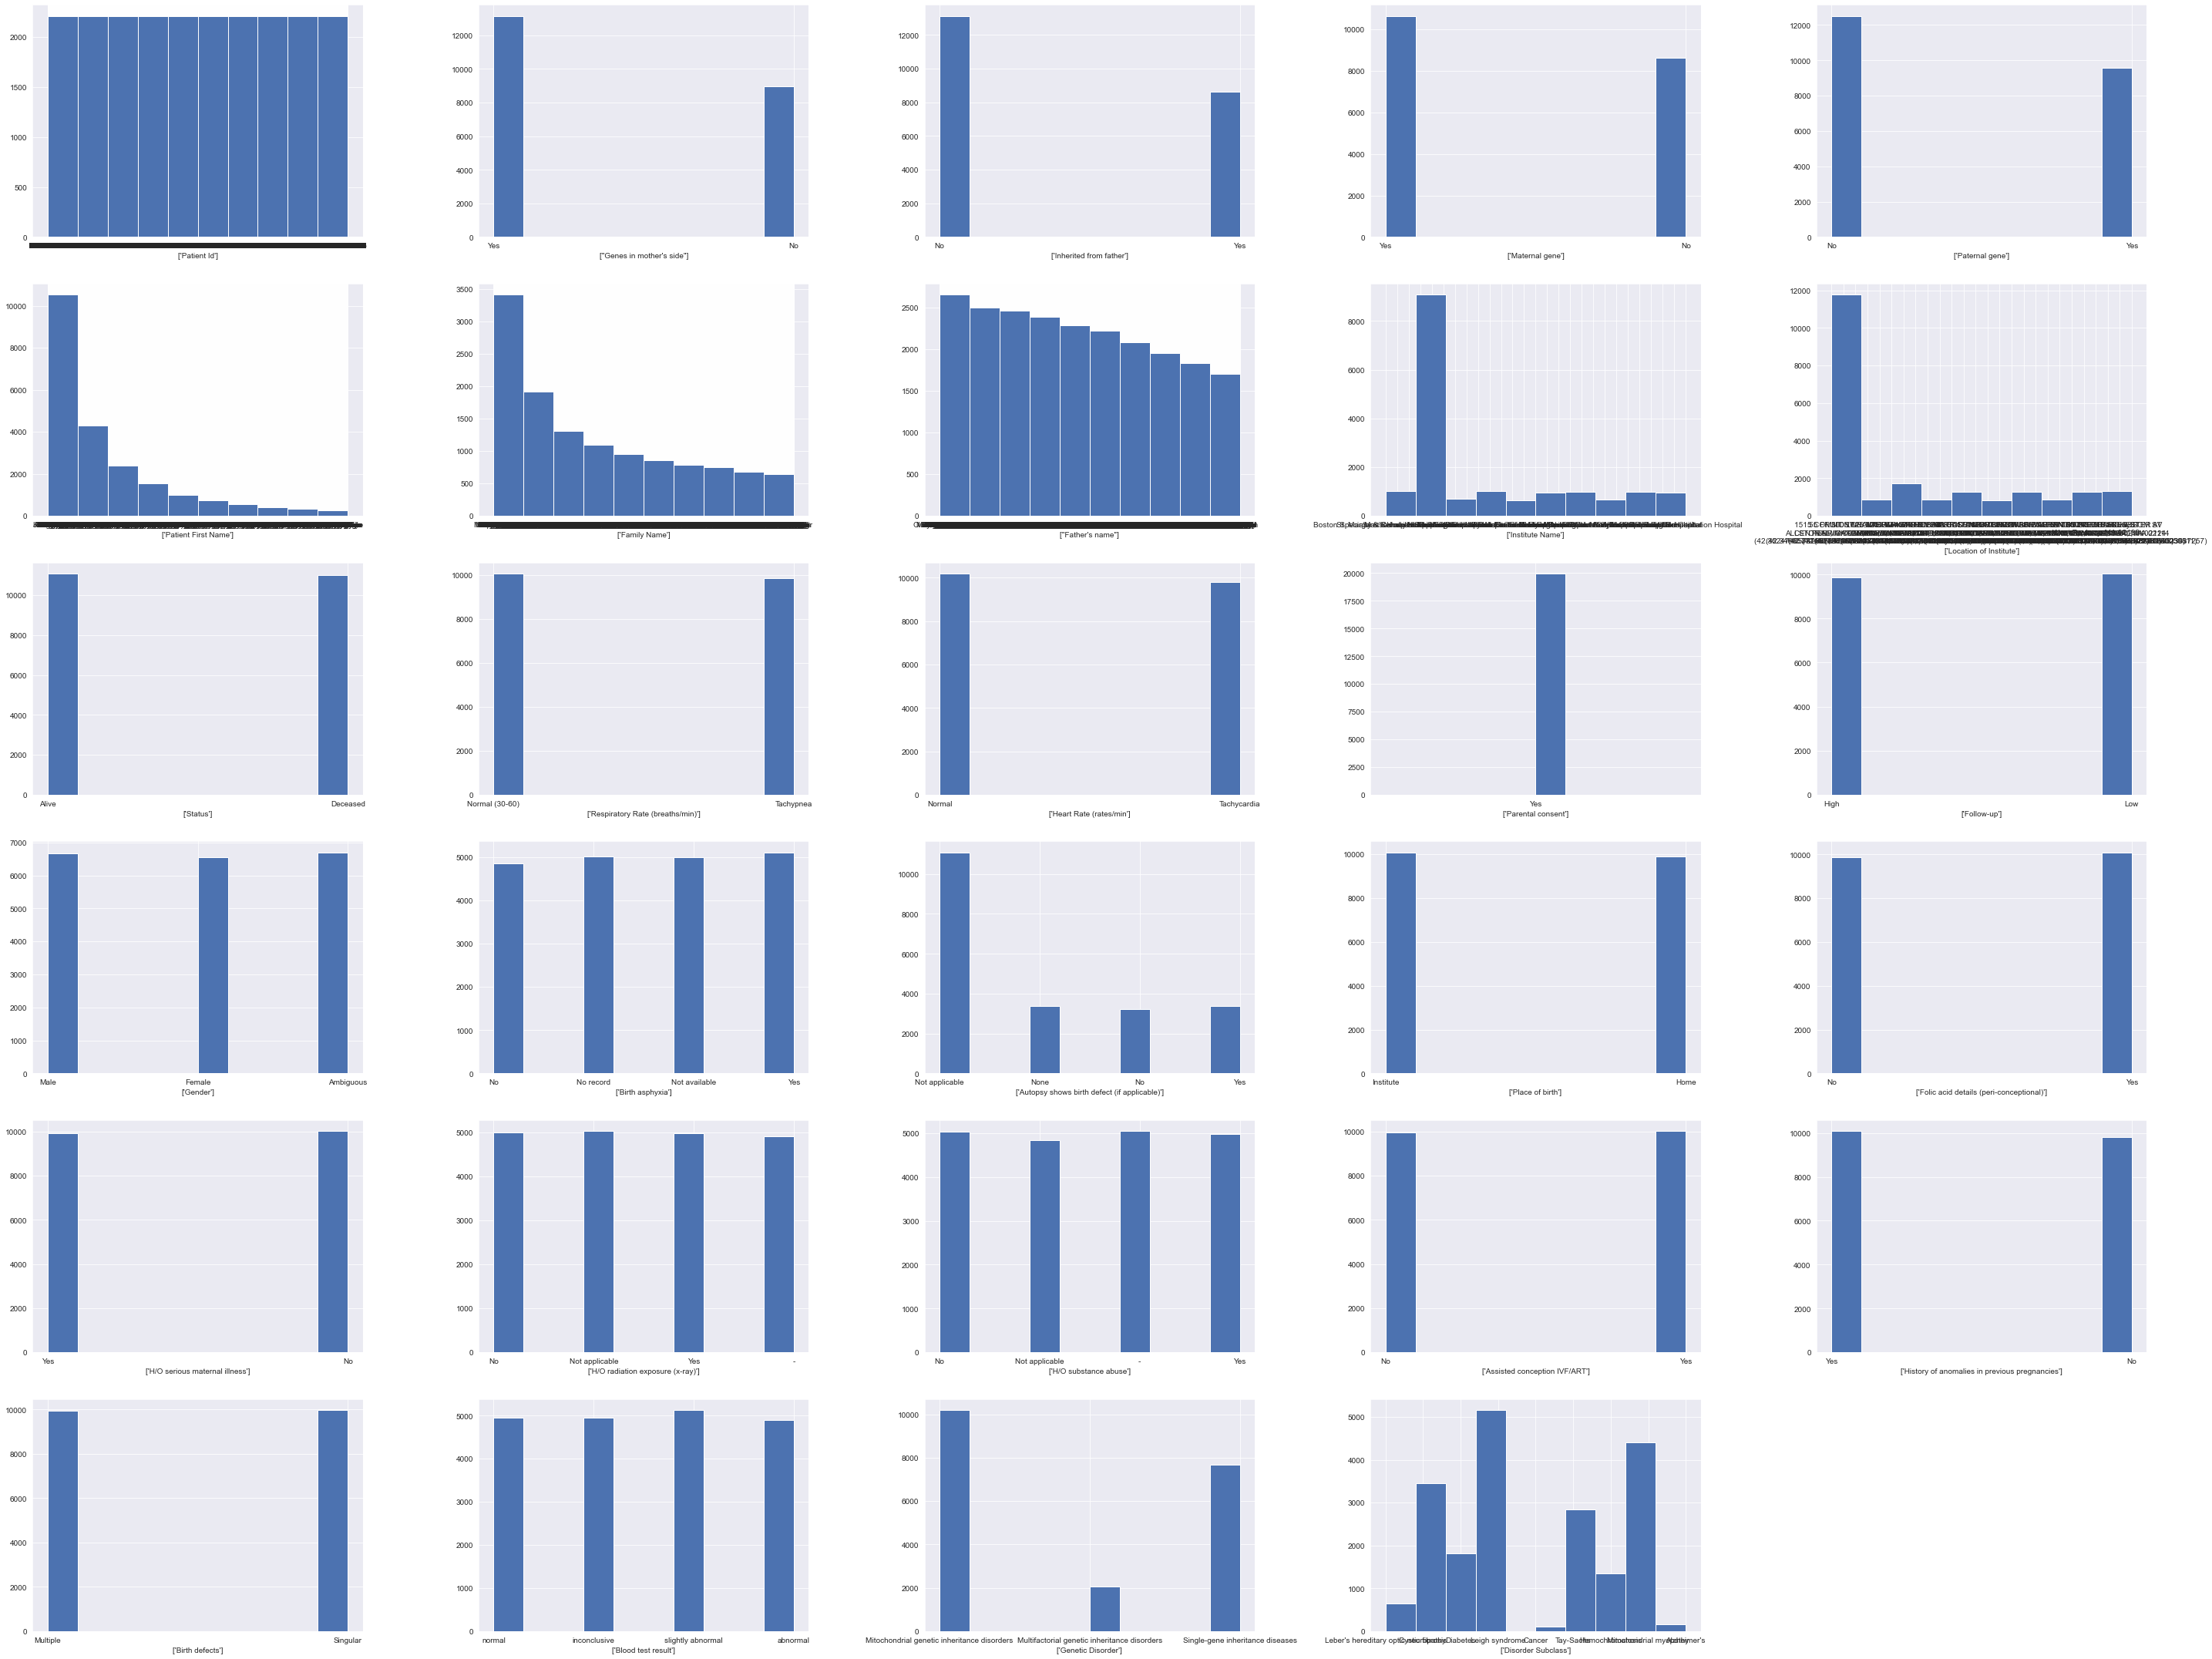

In [16]:
figure2 = plt.figure(figsize= (40,30))

for i in range(len(cat_feature.columns)):
    figure2.add_subplot(6,5,i+1)
    cat_feature.iloc[:,i].hist()
    plt.xlabel([cat_feature.columns[i]])
    
plt.tight_layout()
plt.show()

In [17]:
cat_feature['Genes in mother\'s side'].isnull().values.any()

cat_feature.isnull().count()

Patient Id                                      22083
Genes in mother's side                          22083
Inherited from father                           22083
Maternal gene                                   22083
Paternal gene                                   22083
Patient First Name                              22083
Family Name                                     22083
Father's name                                   22083
Institute Name                                  22083
Location of Institute                           22083
Status                                          22083
Respiratory Rate (breaths/min)                  22083
Heart Rate (rates/min                           22083
Parental consent                                22083
Follow-up                                       22083
Gender                                          22083
Birth asphyxia                                  22083
Autopsy shows birth defect (if applicable)      22083
Place of birth              

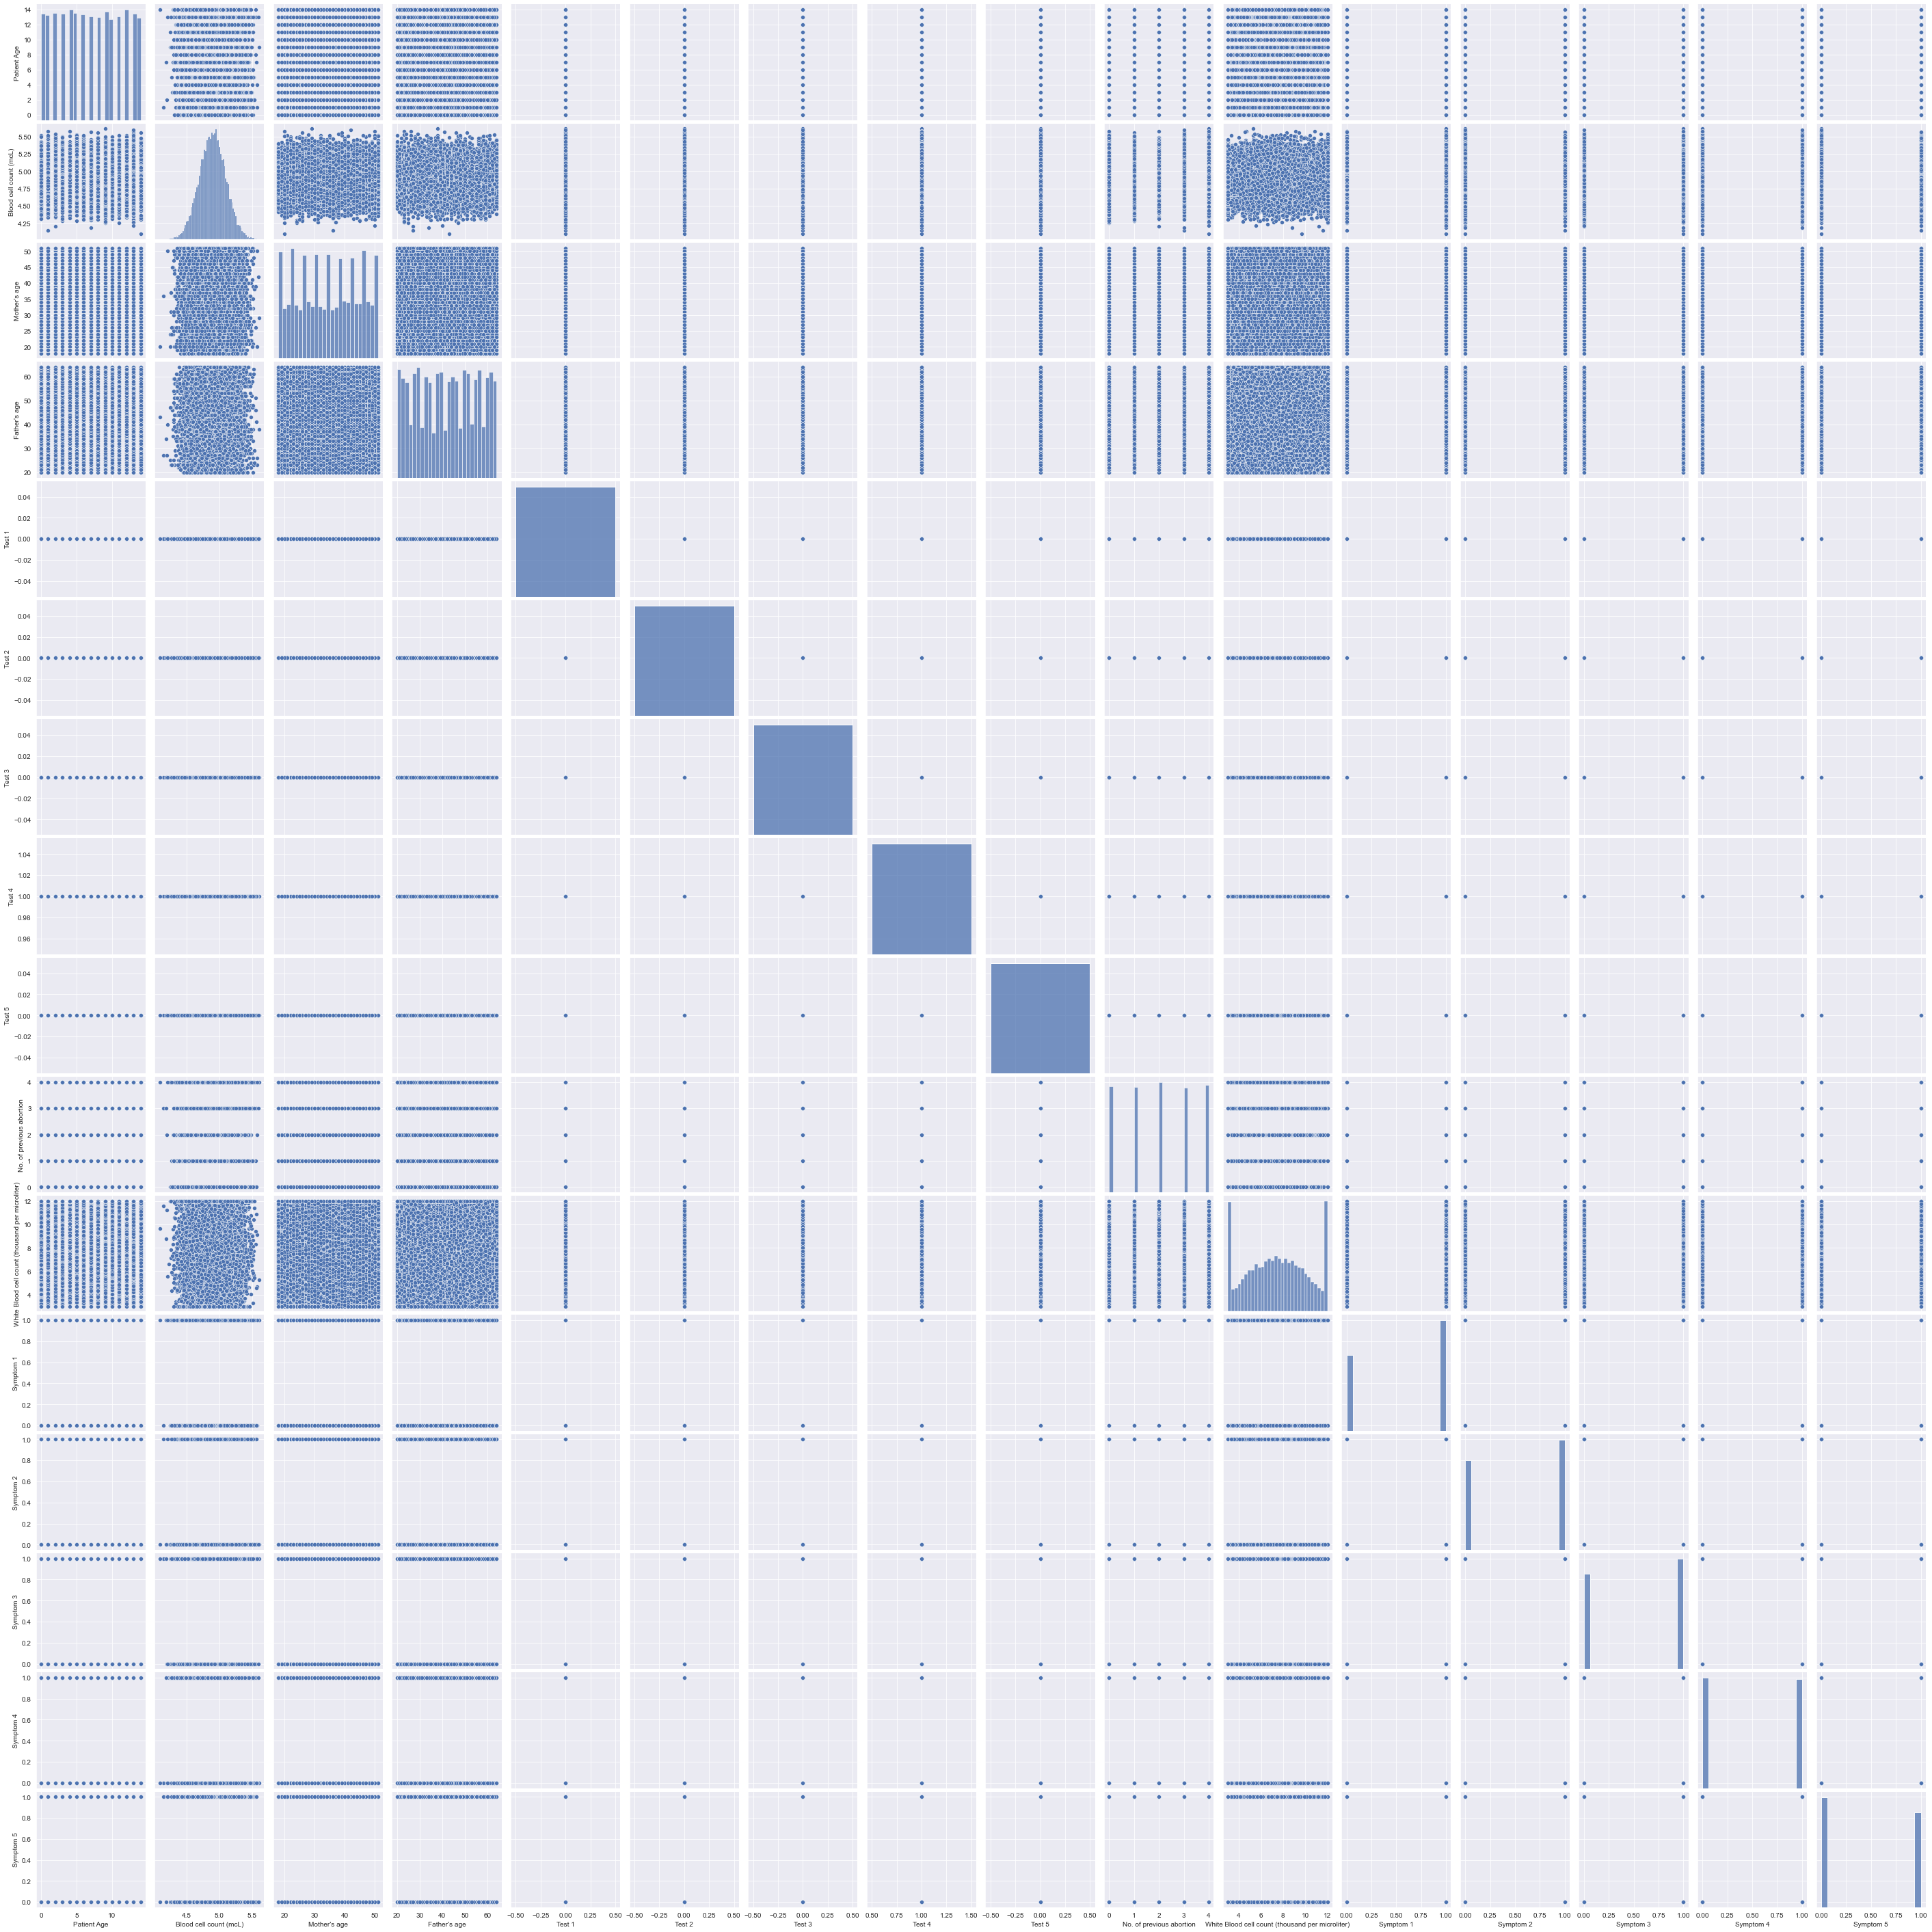

In [18]:
sns.pairplot(df)
plt.show()

# Data Cleaning

## Copying the data frame to make changes

In [19]:
df_copy = df.copy()

In [25]:
skew_features = num_feature.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

Symptom 1                                          -0.376455
Symptom 2                                          -0.208685
Symptom 3                                          -0.145323
Father's age                                       -0.005840
Mother's age                                       -0.005154
No. of previous abortion                           -0.001031
Test 1                                              0.000000
Test 2                                              0.000000
Test 3                                              0.000000
Test 4                                              0.000000
Test 5                                              0.000000
White Blood cell count (thousand per microliter)    0.006639
Symptom 4                                           0.009014
Patient Age                                         0.009507
Blood cell count (mcL)                              0.010023
Symptom 5                                           0.152788
dtype: float64

## Replacing the Null/NaN values

In [20]:
# we will replace the null values of integer/float category to the Mean/Median/Mode of the features

df_copy["Patient Age"]fillna.fillna(df_copy["Patient Age"].mean(), inplace = True)
df_copy["Mother\'s age"].fillna(df_copy["Mother\'s age"].mean(), inplace = True)
df_copy["Father\'s age"].fillna(df_copy["Father\'s age"].mean(), inplace = True)
df_copy["Test 1"].fillna(df_copy["Test 1"].mode(), inplace = True)
df_copy["Test 2"].fillna(df_copy["Test 2"].mode(), inplace = True)
df_copy["Test 3"].fillna(df_copy["Test 3"].mode(), inplace = True)
df_copy["Test 4"].fillna(df_copy["Test 4"].mode(), inplace = True)
df_copy["Test 5"].fillna(df_copy["Test 5"].mode(), inplace = True)
df_copy["No. of previous abortion"].fillna(df_copy["No. of previous abortion"].median(), inplace = True)
df_copy["White Blood cell count (thousand per microliter)"].fillna(df_copy["White Blood cell count (thousand per microliter)"].median(), inplace = True)
df_copy["Symptom 1"].fillna(df_copy["Symptom      1"].mode(), inplace = True)
df_copy["Symptom 2"].fillna(df_copy["Symptom 2"].mode(), inplace = True)
df_copy["Symptom 3"].fillna(df_copy["Symptom 3"].mode(), inplace = True)
df_copy["Symptom 4"].fillna(df_copy["Symptom 4"].mode(), inplace = True)
df_copy["Symptom 5"].fillna(df_copy["Symptom 5"].mode(), inplace = True)

# We will replace the null values of object category to the mode of the features
df_copy["Genes in mother\'s side"].fillna(df_copy["Genes in mother\'s side"].mode(), inplace = True)
df_copy["Inherited from father"].fillna(df_copy["Inherited from father"].mode(), inplace = True)
df_copy["Respiratory Rate (breaths/min)"].fillna(df_copy["Respiratory Rate (breaths/min)"].mode(), inplace = True)
df_copy["Heart Rate (rates/min"].fillna(df_copy["Heart Rate (rates/min"].mode(), inplace = True)
df_copy["Status"].fillna(df_copy["Status"].mode(), inplace = True)
df_copy["Follow-up"].fillna(df_copy["Follow-up"].mode(), inplace = True)
df_copy["Gender"].fillna(df_copy["Gender"].mode(), inplace = True)
#df_copy["Birth asphyxia"].fillna(df_copy["Birth asphyxia"].mode(), inplace = True)
df_copy["Place of birth"].fillna(df_copy["Place of birth"].mode(), inplace = True)
df_copy["Folic acid details (peri-conceptional)"].fillna(df_copy["Folic acid details (peri-conceptional)"].mode(), inplace = True)
df_copy["H/O serious maternal illness"].fillna(df_copy["H/O serious maternal illness"].mode(), inplace = True)
df_copy["Assisted conception IVF/ART"].fillna(df_copy["Assisted conception IVF/ART"].mode(), inplace = True)
df_copy["History of anomalies in previous pregnancies"].fillna(df_copy["History of anomalies in previous pregnancies"].mode(), inplace = True)
df_copy["Birth defects"].fillna(df_copy["Birth defects"].mode(), inplace = True)
df_copy["Blood test result"].fillna(df_copy["Blood test result"].mode(), inplace = True)

12.0    1435
4.0     1435
9.0     1415
2.0     1396
5.0     1394
0.0     1386
13.0    1384
3.0     1383
6.0     1374
1.0     1364
11.0    1353
7.0     1351
8.0     1340
14.0    1333
10.0    1313
Name: Patient Age, dtype: int64

In [38]:
cat_feature.isnull().sum()

Patient Id                                         0
Genes in mother's side                             0
Inherited from father                            306
Maternal gene                                   2810
Paternal gene                                      0
Patient First Name                                 0
Family Name                                     9691
Father's name                                      0
Institute Name                                  5106
Location of Institute                              0
Status                                             0
Respiratory Rate (breaths/min)                  2149
Heart Rate (rates/min                           2113
Parental consent                                2125
Follow-up                                       2166
Gender                                          2173
Birth asphyxia                                  2139
Autopsy shows birth defect (if applicable)      1026
Place of birth                                

count              19934
unique                 2
top       Normal (30-60)
freq               10065
Name: Respiratory Rate (breaths/min), dtype: object
---------------------------
0    Normal (30-60)
dtype: object
---------------------------


<AxesSubplot:>

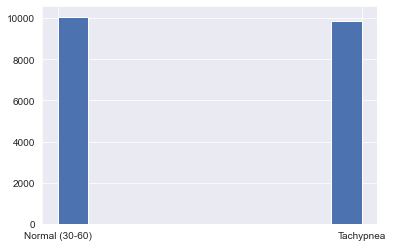

In [73]:
temp = "Respiratory Rate (breaths/min)"

print(df_copy[temp].describe())
print("---------------------------")
print(df_copy[temp].mode())
print("---------------------------")
cat_feature[temp].hist()

## Columns which needs to be removed 

Patient Id, Patient First Name, Family Name, Father's name, Institute Name, Location of Institute, Parental consent,


<h3>Note:</h3> for <b>Birth asphyxia</b> have to see later. cause apart from "Yes" and "No", we were having 2 more values "No records" and "Not available".

In [79]:
df_copy2 = df_copy.copy()

In [80]:
# Categorical boolean mask
categorical_feature_mask = df_copy2.dtypes==object

In [81]:
# filter categorical columns using mask and turn it into a list
categorical_cols = df_copy2.columns[categorical_feature_mask].tolist()

In [82]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [84]:
# apply le on categorical feature columns
df_copy2[categorical_cols] = df_copy2[categorical_cols].apply(lambda col: le.fit_transform(col))
df_copy2[categorical_cols].head(10)

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
0,12659,1,0,1,0,2008,6282,9538,5,18,0,0,0,0,0,3,4,2,1,0,2,1,1,0,1,2,4,0,5
1,3249,1,1,0,0,1742,6282,2030,24,6,1,1,0,0,0,3,0,1,2,1,1,2,2,0,1,0,2,3,2
2,8730,1,0,0,0,1348,6282,11156,27,0,0,0,1,0,1,3,1,2,2,1,0,3,4,1,1,1,2,1,3
3,8764,1,0,1,0,1153,2580,62,27,18,1,1,0,0,0,2,2,0,1,0,1,0,2,2,1,1,1,0,6
4,1781,1,0,2,1,1208,5532,14014,7,13,0,1,1,1,1,2,2,2,1,0,1,0,2,1,0,0,4,1,1
5,7916,1,0,1,0,2008,6282,2779,17,18,1,2,0,0,1,1,2,1,1,0,0,1,1,2,0,0,2,2,2
6,3697,1,0,1,1,1677,6282,1365,20,0,0,0,2,1,1,2,1,2,0,2,1,1,2,1,0,0,2,2,8
7,9484,0,0,1,1,754,718,8727,20,0,0,1,0,0,1,3,1,2,0,1,1,1,0,0,1,1,1,2,8
8,18873,0,0,1,0,2479,832,14750,15,3,0,1,1,0,1,2,3,2,1,1,1,1,1,0,1,0,3,0,6
9,17861,0,1,1,1,1209,5024,5682,21,2,0,1,1,0,1,2,0,2,1,1,0,1,1,1,1,0,0,1,3


In [94]:
df_copy2

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,12659,2.0,1,0,1,0,4.760603,2008,6282,9538,NaN,NaN,5,18,0,0,0,0.0,NaN,NaN,1.0,0.0,0,0,3,4,2,1,0,2,1,1,0,1,NaN,2,9.857562,4,1.0,1.0,1.0,1.0,1.0,0,5
1,3249,4.0,1,1,0,0,4.910669,1742,6282,2030,NaN,23.0,24,6,1,1,0,NaN,0.0,0.0,1.0,0.0,0,0,3,0,1,2,1,1,2,2,0,1,NaN,0,5.522560,2,1.0,NaN,1.0,1.0,0.0,3,2
2,8730,6.0,1,0,0,0,4.893297,1348,6282,11156,41.0,22.0,27,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0,1,3,1,2,2,1,0,3,4,1,1,4.0,1,NaN,2,0.0,1.0,1.0,1.0,1.0,1,3
3,8764,12.0,1,0,1,0,4.705280,1153,2580,62,21.0,NaN,27,18,1,1,0,0.0,0.0,0.0,1.0,0.0,0,0,2,2,0,1,0,1,0,2,2,1,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,1781,11.0,1,0,2,1,4.720703,1208,5532,14014,32.0,NaN,7,13,0,1,1,0.0,0.0,0.0,1.0,0.0,1,1,2,2,2,1,0,1,0,2,1,0,4.0,0,4.098210,4,0.0,0.0,0.0,0.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,10422,4.0,1,1,1,0,5.258298,1575,6282,573,35.0,64.0,11,1,1,0,1,NaN,0.0,NaN,1.0,0.0,0,0,1,0,0,1,2,0,2,1,1,0,3.0,0,6.584811,1,0.0,0.0,1.0,0.0,0.0,0,6
22079,1449,8.0,0,1,0,1,4.974220,1688,1756,3409,NaN,56.0,10,7,0,0,0,NaN,0.0,NaN,1.0,NaN,1,0,0,0,2,1,1,1,1,0,1,0,2.0,0,7.041556,1,1.0,1.0,1.0,1.0,0.0,1,3
22080,6636,8.0,1,0,1,0,5.186470,1209,6282,2362,35.0,51.0,20,0,1,1,0,0.0,0.0,0.0,1.0,NaN,0,0,2,0,1,0,0,0,4,1,0,0,2.0,1,7.715464,2,0.0,0.0,0.0,1.0,NaN,0,7
22081,560,7.0,1,0,1,1,4.858543,2173,6282,1730,19.0,NaN,20,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0,0,2,1,2,0,1,1,0,3,1,0,1.0,0,8.437670,0,1.0,1.0,1.0,0.0,0.0,3,6


In [93]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categories= categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(df_copy2) # It returns an numpy array

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [88]:
df_copy2

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,12659,2.0,1,0,1,0,4.760603,2008,6282,9538,NaN,NaN,5,18,0,0,0,0.0,NaN,NaN,1.0,0.0,0,0,3,4,2,1,0,2,1,1,0,1,NaN,2,9.857562,4,1.0,1.0,1.0,1.0,1.0,0,5
1,3249,4.0,1,1,0,0,4.910669,1742,6282,2030,NaN,23.0,24,6,1,1,0,NaN,0.0,0.0,1.0,0.0,0,0,3,0,1,2,1,1,2,2,0,1,NaN,0,5.522560,2,1.0,NaN,1.0,1.0,0.0,3,2
2,8730,6.0,1,0,0,0,4.893297,1348,6282,11156,41.0,22.0,27,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0,1,3,1,2,2,1,0,3,4,1,1,4.0,1,NaN,2,0.0,1.0,1.0,1.0,1.0,1,3
3,8764,12.0,1,0,1,0,4.705280,1153,2580,62,21.0,NaN,27,18,1,1,0,0.0,0.0,0.0,1.0,0.0,0,0,2,2,0,1,0,1,0,2,2,1,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,1781,11.0,1,0,2,1,4.720703,1208,5532,14014,32.0,NaN,7,13,0,1,1,0.0,0.0,0.0,1.0,0.0,1,1,2,2,2,1,0,1,0,2,1,0,4.0,0,4.098210,4,0.0,0.0,0.0,0.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,10422,4.0,1,1,1,0,5.258298,1575,6282,573,35.0,64.0,11,1,1,0,1,NaN,0.0,NaN,1.0,0.0,0,0,1,0,0,1,2,0,2,1,1,0,3.0,0,6.584811,1,0.0,0.0,1.0,0.0,0.0,0,6
22079,1449,8.0,0,1,0,1,4.974220,1688,1756,3409,NaN,56.0,10,7,0,0,0,NaN,0.0,NaN,1.0,NaN,1,0,0,0,2,1,1,1,1,0,1,0,2.0,0,7.041556,1,1.0,1.0,1.0,1.0,0.0,1,3
22080,6636,8.0,1,0,1,0,5.186470,1209,6282,2362,35.0,51.0,20,0,1,1,0,0.0,0.0,0.0,1.0,NaN,0,0,2,0,1,0,0,0,4,1,0,0,2.0,1,7.715464,2,0.0,0.0,0.0,1.0,NaN,0,7
22081,560,7.0,1,0,1,1,4.858543,2173,6282,1730,19.0,NaN,20,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0,0,2,1,2,0,1,1,0,3,1,0,1.0,0,8.437670,0,1.0,1.0,1.0,0.0,0.0,3,6


In [90]:
df_copy['Birth asphyxia'].replace(['No record', 'Not available'],[np.nan,np.nan],inplace=True)

count     9950
unique       2
top        Yes
freq      5106
Name: Birth asphyxia, dtype: object
---------------------------
0    Yes
dtype: object
---------------------------
Unique values are
[nan 'No' 'Yes']
---------------------------


<AxesSubplot:>

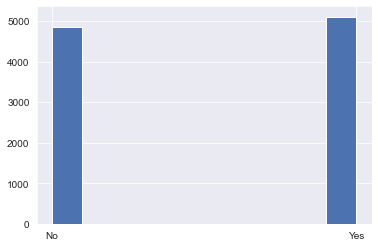

In [91]:
temp = "Birth asphyxia"

print(df_copy[temp].describe())
print("---------------------------")
print(df_copy[temp].mode())
print("---------------------------")
print("Unique values are")
print(df_copy[temp].unique())
print("---------------------------")
df_copy[temp].hist()

In [95]:
df_test = pd.read_csv("test.csv")

In [97]:
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features


In [98]:
num_test_features,cat_test_features = getFeatures(df_test)

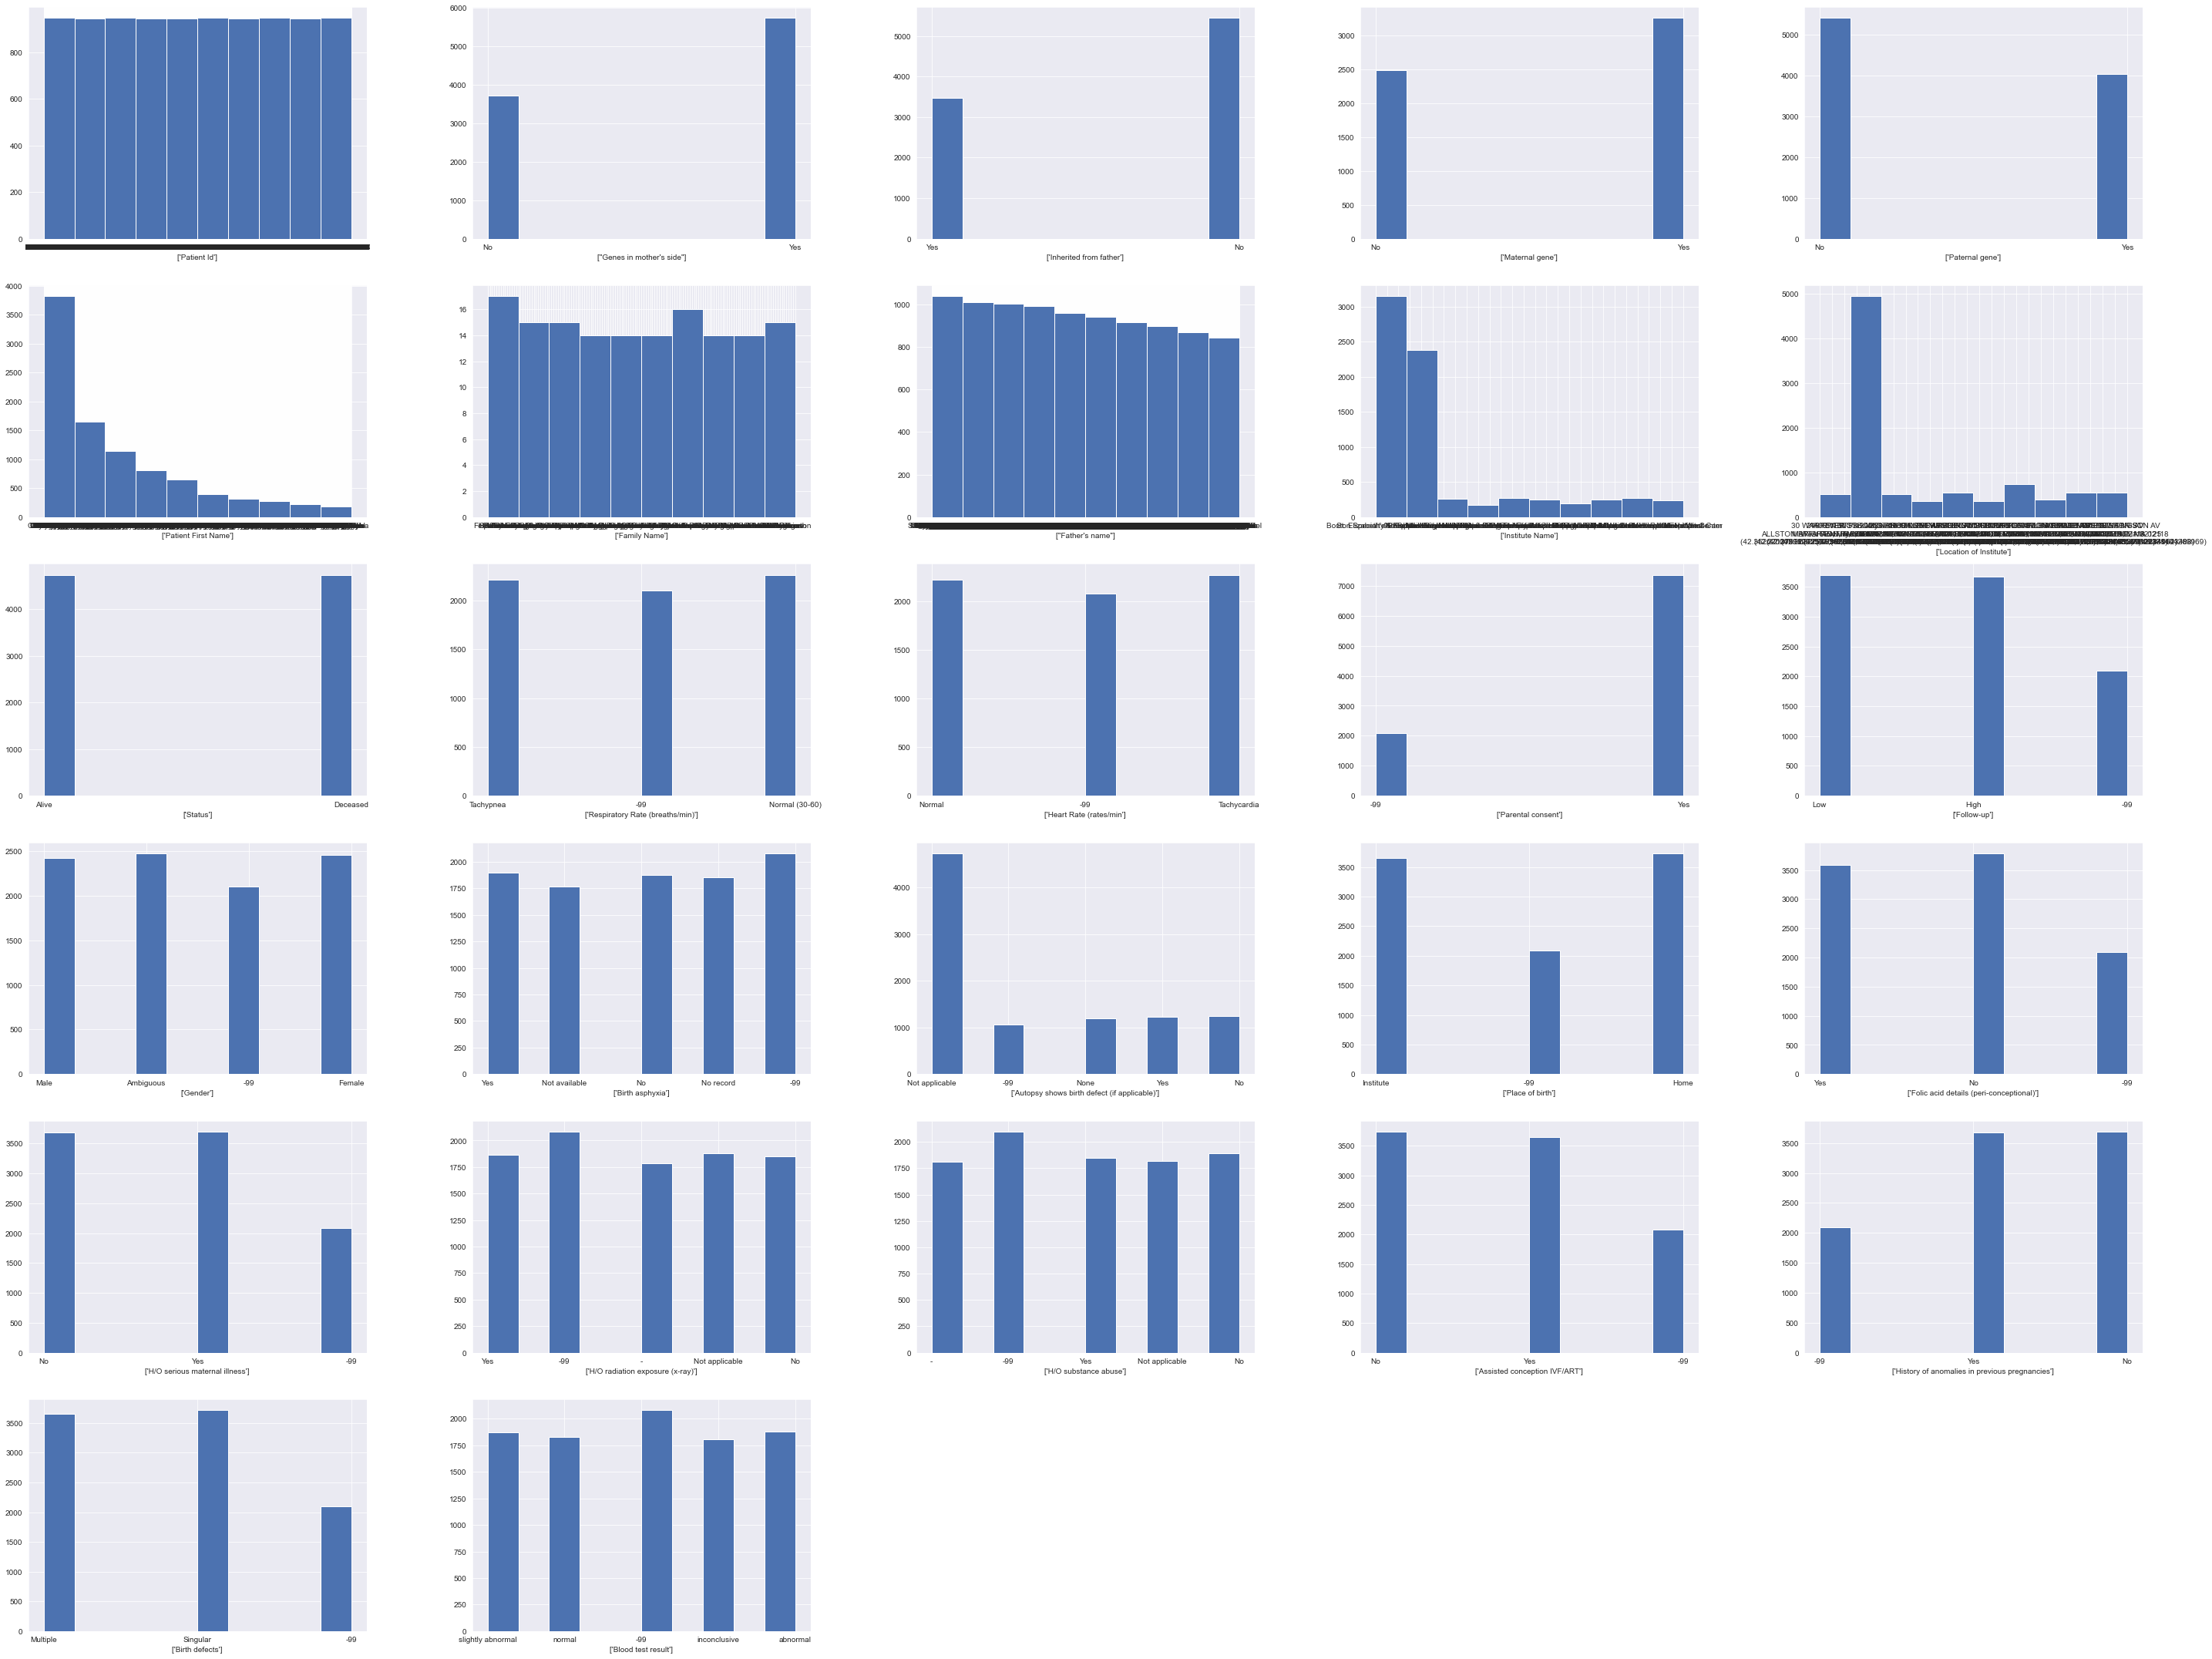

In [100]:
## Hist plot for categorical features in test set
figure3 = plt.figure(figsize=(40,30))
for i in range(len(cat_test_features.columns)):
    figure3.add_subplot(6,5,i+1)
    cat_test_features.iloc[:,i].hist()
    plt.xlabel([cat_test_features.columns[i]])
    
plt.tight_layout()
plt.show()

In [103]:
for col in df_test.columns:
    if df[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, df[col].nunique()-df_test[col].nunique()))

For column Patient Id cardinality in Train minus cardinality in Test equals: 12618
For column Genes in mother's side cardinality in Train minus cardinality in Test equals: 0
For column Inherited from father cardinality in Train minus cardinality in Test equals: 0
For column Maternal gene cardinality in Train minus cardinality in Test equals: 0
For column Paternal gene cardinality in Train minus cardinality in Test equals: 0
For column Patient First Name cardinality in Train minus cardinality in Test equals: 836
For column Family Name cardinality in Train minus cardinality in Test equals: 6141
For column Father's name cardinality in Train minus cardinality in Test equals: 8067
For column Institute Name cardinality in Train minus cardinality in Test equals: -1
For column Location of Institute cardinality in Train minus cardinality in Test equals: 0
For column Status cardinality in Train minus cardinality in Test equals: 0
For column Respiratory Rate (breaths/min) cardinality in Train min

In [114]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in df.columns:
     if df[col].dtype == "object" and (df[col].nunique()-df_test[col].nunique()) != 0:
        cols_list.append(col)

In [115]:
cols_list

['Patient Id',
 'Patient First Name',
 'Family Name',
 "Father's name",
 'Institute Name',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

/Users/anshulchaurasia/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


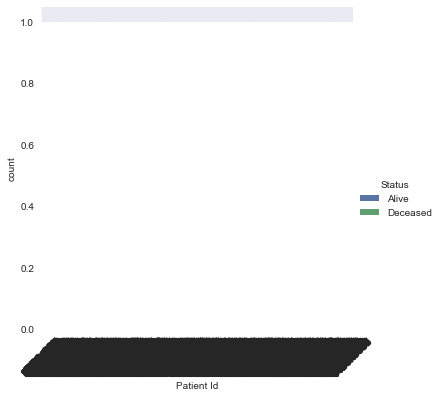

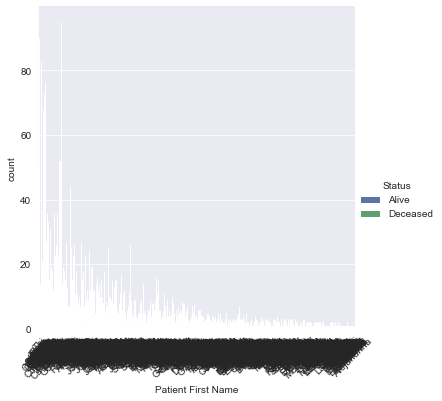

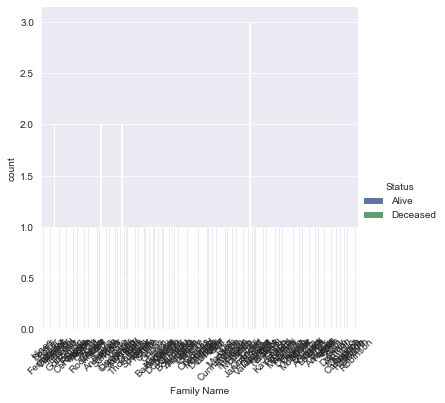

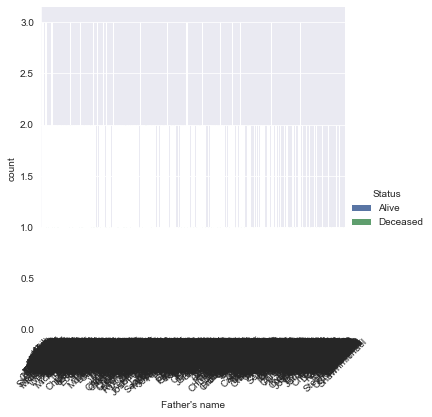

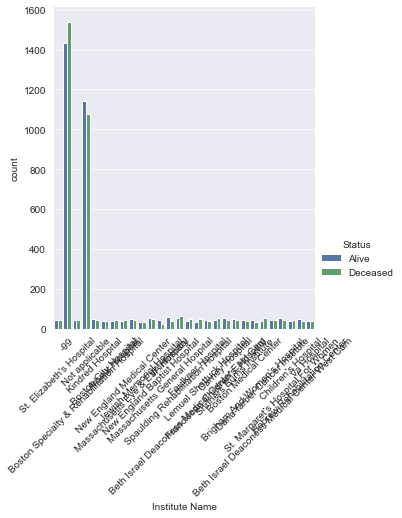

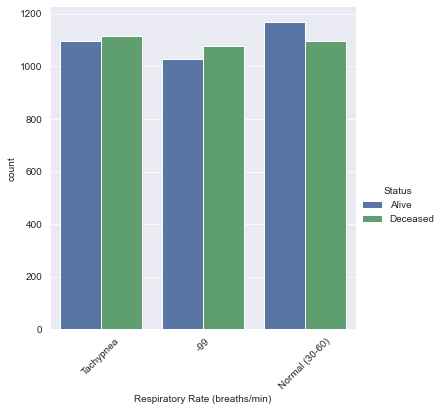

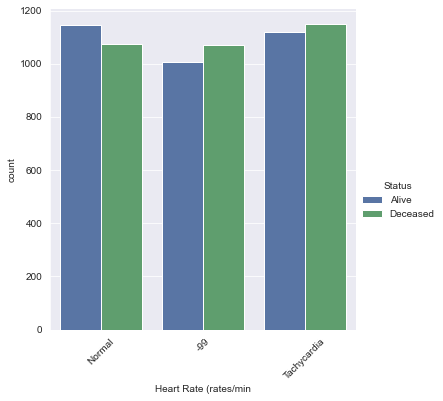

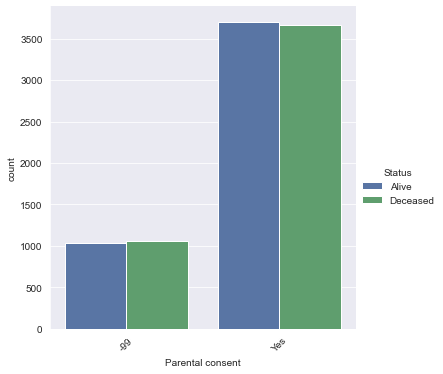

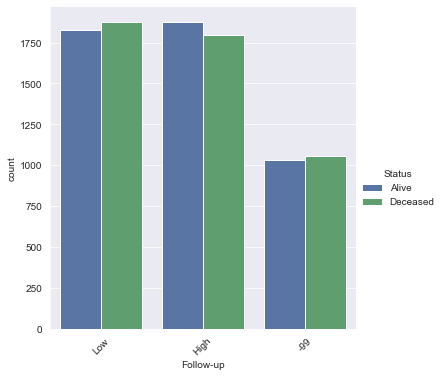

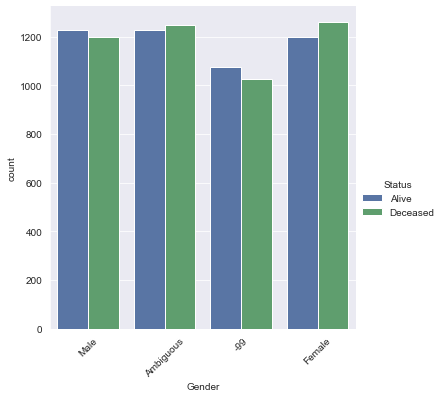

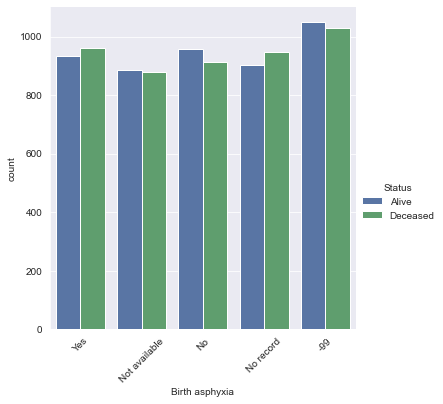

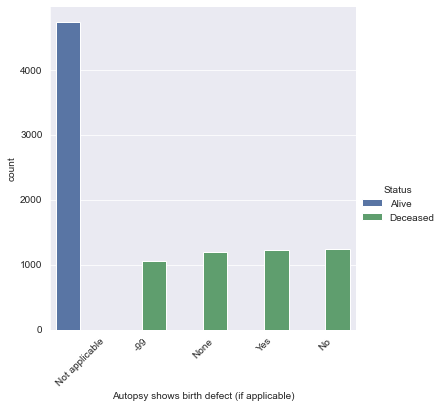

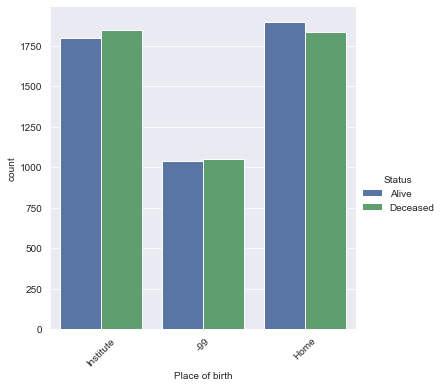

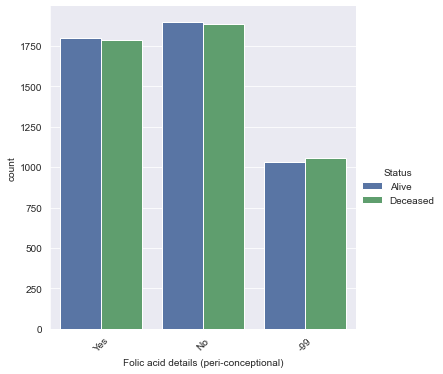

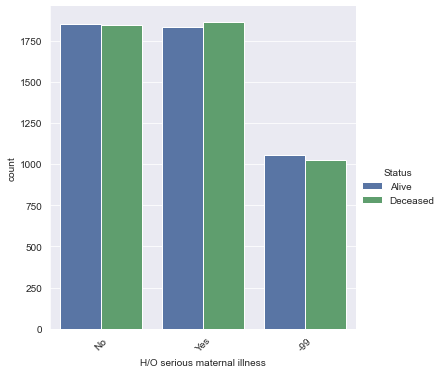

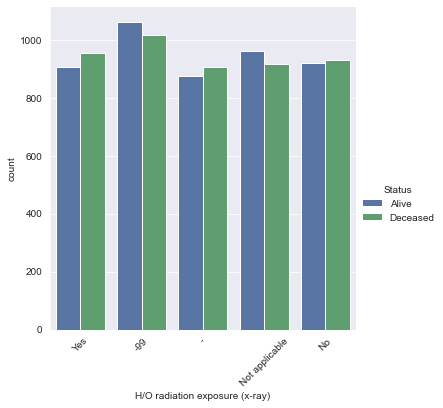

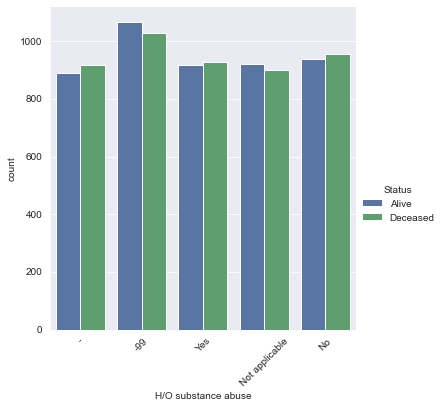

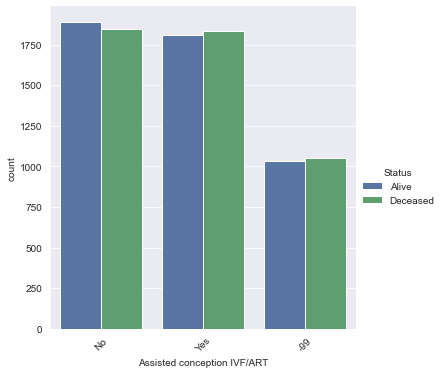

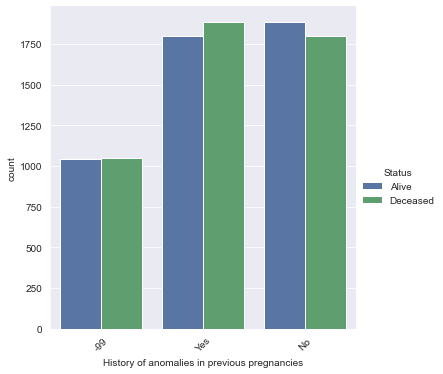

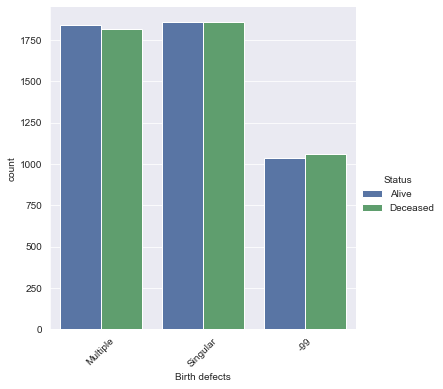

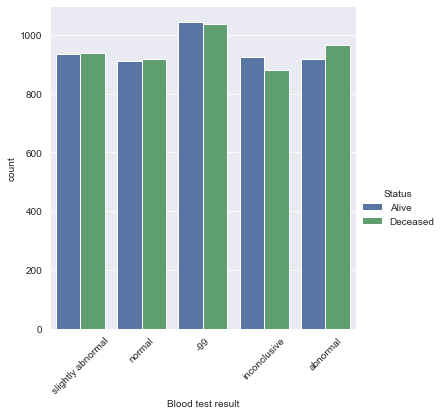

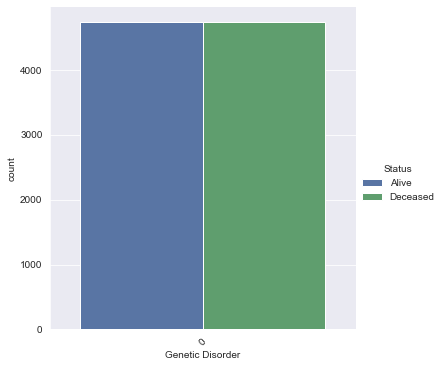

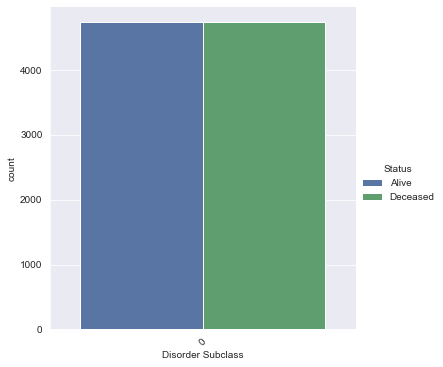

In [117]:
# looking at values in these columns
for l in cols_list:
    sns.barplot(x=l, hue='Status', kind='count', data=df_test)
    plt.xticks(rotation=45)

In [113]:
# Get missing columns in the training test
missing_cols = set( df.columns ) - set( df_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
temp = df_test[df.columns]
temp

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,38,61,St. Elizabeth's Hospital,"30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....",Alive,Tachypnea,Normal,0,-99,0,1,0,-99,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,-,No,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True,0,0
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,33,53,-99,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",Alive,NaN,-99,0,0,-99,1,-99,Yes,Low,Male,Yes,Not applicable,-99,Yes,No,-99,-99,No,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False,0,0
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,48,60,NaN,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",Deceased,NaN,Normal,0,0,0,1,0,-99,Low,Ambiguous,Not available,-99,Institute,No,Yes,Yes,Yes,Yes,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False,0,0
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,25,55,Boston Specialty & Rehabilitation Hospital,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,-99,-99,0,0,0,1,0,-99,Low,Ambiguous,No,Not applicable,-99,Yes,Yes,-,-99,-99,Yes,-99,Singular,6.884071,normal,True,False,True,False,True,0,0
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,41,38,Not applicable,-,Deceased,Tachypnea,NaN,0,0,0,1,0,Yes,Low,Ambiguous,No,None,Home,Yes,Yes,Yes,Not applicable,No,No,-99,Multiple,6.195178,normal,True,True,True,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,PID0x81e1,9,Yes,Yes,NaN,No,4.878335,Francisco,NaN,Artavian,28,63,NaN,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,-99,NaN,-99,0,-99,1,-99,Yes,Low,-99,No,Not applicable,Institute,Yes,-99,-99,-99,No,Yes,2,Multiple,7.234960,abnormal,False,True,True,True,False,0,0
9461,PID0x3514,1,Yes,No,NaN,Yes,4.927151,James,NaN,Nasir,37,62,-99,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Deceased,-99,-99,0,0,-99,1,-99,Yes,-99,Male,Yes,None,Institute,-99,No,Yes,Yes,-99,No,-99,Singular,4.859536,abnormal,False,True,False,True,True,0,0
9462,PID0x5408,2,No,Yes,No,No,4.898352,Rebecca,NaN,Jatorian,24,32,St. Margaret's Hospital For Women,"170 MORTON ST\nROSLINDALE, MA 02130\n(42.30025...",Deceased,Tachypnea,Tachycardia,-99,0,0,1,0,Yes,-99,Female,Not available,Yes,Institute,Yes,-99,Not applicable,Yes,No,No,3,-99,5.696062,normal,False,True,False,False,True,0,0
9463,PID0x2017,13,No,Yes,No,No,4.804840,Daryl,NaN,Keevis,36,56,-99,-,Alive,NaN,Normal,0,0,0,1,0,Yes,High,-99,Yes,Not applicable,Home,Yes,-99,No,No,Yes,-99,1,Singular,3.000000,inconclusive,True,True,True,True,True,0,0


In [ ]:
sns.catplot(x="", y="", hue="", kind="bar", data=df)

In [ ]:
figure3 = plt.figure(figsize=(40,30))
for i in range(len(cat_test_features.columns)):
    figure3.add_subplot(6,5,i+1)
    cat_test_features.iloc[:,i].hist()
    plt.xlabel([cat_test_features.columns[i]])
    
plt.tight_layout()
plt.show()

<ipython-input-124-4c570c6eec3a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  figure3.add_subplot(6,5,i+1)


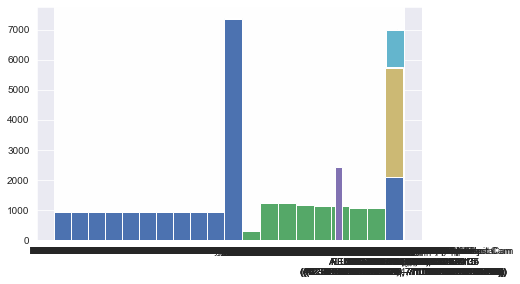

In [124]:
# looking at values in these columns
figure3 = plt.figure(figsize=(40,30))
for l in cat_test_features:
    figure3.add_subplot(6,5,i+1)
    cat_test_features[l].hist()

<AxesSubplot:>

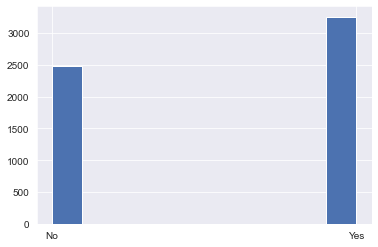

In [123]:
cat_test_features["Maternal gene"].hist()